# 3. data preprocessing

In [1]:
import pandas as pd

import numpy as np

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt

%run ./scripts/corr_to_html.py
%run ./scripts/pd_display.py

In [2]:
df = pd.read_pickle("./pickles/002.dataframe.data-analytics.pkl")

## 3.1. categorical features

### 3.1.1. Amenities

#### 3.1.1.1. one-hot
The amenities are stored as a *list* in the data frame.
Because this is a *list* of categorical features, I will store them in a one-hot numeric array

In [3]:
df["amenities"]

0         [Heating, Kitchen, Washer, Wifi, Long term sta...
1         [Shampoo, Heating, Kitchen, Essentials, Washer...
2         [Heating, TV, Kitchen, Washer, Wifi, Long term...
3         [Heating, TV, Kitchen, Wifi, Long term stays a...
4         [Heating, TV, Kitchen, Essentials, Hair dryer,...
                                ...                        
279707    [Iron, Heating, Washer, Dedicated workspace, E...
279708    [Shampoo, Iron, Heating, Washer, Hair dryer, E...
279709    [Paid parking off premises, Shampoo, First aid...
279710    [TV, Iron, Kitchen, Hangers, Smoke alarm, Cabl...
279711    [Shower gel, Shampoo, Iron, Heating, Washer, D...
Name: amenities, Length: 279599, dtype: object

In [4]:
df["amenities"][0]

['Heating', 'Kitchen', 'Washer', 'Wifi', 'Long term stays allowed']

In [5]:
type(df["amenities"][0])

list

In [6]:
df["amenities"][0][0]

'Heating'

In [7]:
mlb = MultiLabelBinarizer()
df_amenities = pd.DataFrame(mlb.fit_transform(df["amenities"]), index=df.index)

In [8]:
df_amenities

0     1     2     3     4     5     6     7     8     9     10     
0          0     0     0     0     0     0     0     0     0     0     0  \
1          0     0     0     0     0     0     0     0     0     0     0   
2          0     0     0     0     0     0     0     0     0     0     0   
3          0     0     0     0     0     0     0     0     0     0     0   
4          0     0     0     0     0     0     0     0     0     0     0   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
279707     0     0     0     0     0     0     0     0     0     0     0   
279708     0     0     0     0     0     0     0     0     0     0     0   
279709     0     0     0     0     0     0     0     0     0     0     0   
279710     0     0     0     0     0     0     0     0     0     0     0   
279711     0     0     0     0     0     0     0     0     0     0     0   

        11    12    13    14    15    16    17    18    19    20    21     
0          0     0     0     0     0     0     0     0     0     0     0  \
1          0     0     0     0     0     0     0     0     0     0     0   
2          0     0     0     0     0     0     0     0     0     0     0   
3          0     0     0     0     0     0     0     0     0     0     0   
4          0     0     0     0     0     0     0     0     0     0     0   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
279707     0     0     0     0     0     0     0     0     0     0     0   
279708     0     0     0     0     0     0     0     0     0     0     0   
279709     0     0     0     0     0     0     0     0     0     0     0   
279710     0     0     0     0     0     0     0     0     0     0     0   
279711     0     0     0     0     0     0     0     0     0     0     0   

        22    23    24    25    26    27    28    29    30    31    32     
0          0     0     0     0     0     0     0     0     0     0     0  \
1          0     0     0     0     0     0     0     0     0     0     0   
2          0     0     0     0     0     0     0     0     0     0     0   
3          0     0     0     0     0     0     0     0     0     0     0   
4          0     0     0     0     0     0     0     0     0     0     0   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
279707     0     0     0     0     0     0     0     0     0     0     0   
279708     0     0     0     0     0     0     0     0     0     0     0   
279709     0     0     0     0     0     0     0     0     0     0     0   
279710     0     0     0     0     0     0     0     0     0     0     0   
279711     0     0     0     0     0     0     0     0     0     0     0   

        33    34    35    36    37    38    39    40    41    42    43     
0          0     0     0     0     0     0     0     0     0     0     0  \
1          0     0     0     0     0     0     0     0     0     0     0   
2          0     0     0     0     0     0     0     0     0     0     0   
3          0     0     0     0     0     0     0     0     0     0     0   
4          0     0     0     0     0     0     0     0     0     0     0   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
279707     0     0     0     0     0     0     0     0     0     0     0   
279708     0     0     0     0     0     0     0     0     0     0     0   
279709     0     0     0     0     0     0     0     0     0     0     0   
279710     0     0     0     0     0     0     0     0     0     0     0   
279711     0     0     0     0     0     0     0     0     0     0     0   

        44    45    46    47    48    49    50    51    52    53    54     
0          0     0     0     0     0     0     0     0     0     0     0  \
1          0     0     0     0     0     0     0     0     0     0     0   
2          0     0     0     0     0     0     0     0     0     0     0   
3          0     0     0     0     0     0     0    

Storing the different types of amenities in [amenities.csv](analytics/amenities.csv)

In [9]:
pd.Series(mlb.classes_).to_csv("analytics/amenities.csv")
mlb.classes_.size

3270

#### 3.1.1.2. Reducing #amenities

In [10]:
s_amenities_sum = df_amenities.sum()
s_amenities_sum

0       2
1       2
2       2
3       1
4       1
       ..
3265    1
3266    1
3267    1
3268    1
3269    1
Length: 3270, dtype: int64

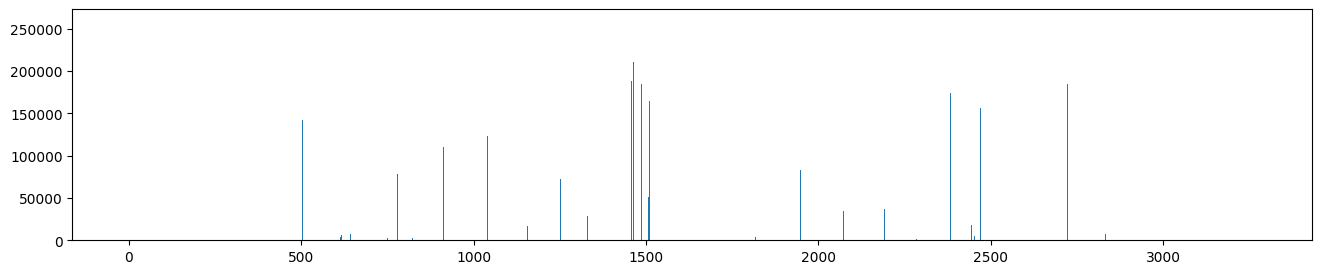

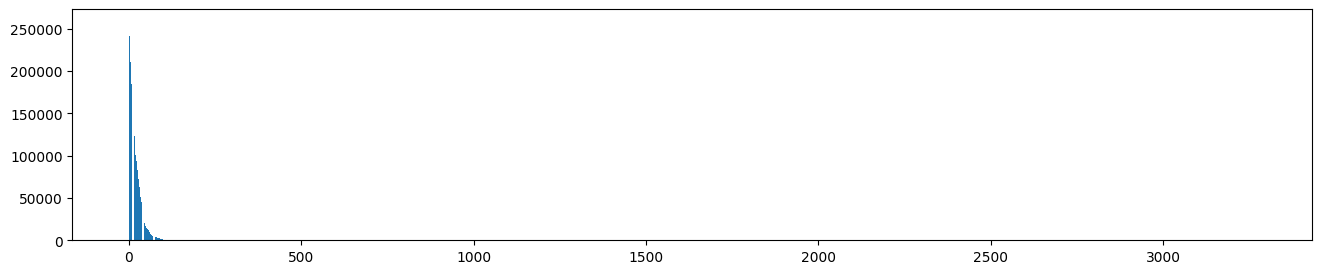

In [11]:
plt.figure(figsize=(16, 3))
plt.bar(s_amenities_sum.index, s_amenities_sum)
plt.show()

plt.figure(figsize=(16, 3))
plt.bar(np.array(range(0, s_amenities_sum.size)), s_amenities_sum.sort_values(ascending=False))
plt.show()

Looking at the graphs above, we can see that there are far too many different amenities. Many of them are only used a few times.

This is partly due to errors in the dataset, see the example below:

In [12]:
print(mlb.classes_[0])
print()
print(mlb.classes_[1])

 Amenities Realgem’s -Talentos do Brasil Feita a base de mel, a linha respeita a natureza e promove o turismo sustentável, pois tem formulação biodegradável, frascos recicláveis e extratos adquiridos de pequenos agricultores brasileiros. Além dos extratos da agricultura familiar, que valorizam e geram renda para os agricultores, 5% do valor das vendas dos cosméticos é destinado à Cooperativa fabricante da matéria-prima Outro diferencial é que estes cosméticos são os únicos do mercado hoteleiro altamente sustentáveis e homologados pelo Ministério do Turismo, Ministério do Desenvolvimento Agrário e SEBRAE.  body soap

 Amenities Realgem’s -Talentos do Brasil Feita a base de mel, a linha respeita a natureza e promove o turismo sustentável, pois tem formulação biodegradável, frascos recicláveis e extratos adquiridos de pequenos agricultores brasileiros. Além dos extratos da agricultura familiar, que valorizam e geram renda para os agricultores, 5% do valor das vendas dos cosméticos é desti

To make it easier for the model, we will only include the amenities that are used in more than $10\%$ of the datapoints.

In [13]:
int(df.shape[0] * .10)

27959

So we will only include the amenities that are used in at least $27959$ different datapoints.

In [14]:
s_amenities_to_use = (s_amenities_sum > int(df.shape[0] * .10))
s_amenities_to_use.value_counts()

False    3227
True       43
Name: count, dtype: int64

This leaves us with a total of $43$ amenities

Below is the list of amenities that will/can be used in the model

In [15]:
pd.Series(mlb.classes_[s_amenities_to_use])

0               Air conditioning
1                     Bed linens
2                      Breakfast
3                       Cable TV
4          Carbon monoxide alarm
5                   Coffee maker
6                 Cooking basics
7            Dedicated workspace
8          Dishes and silverware
9                     Dishwasher
10                         Dryer
11                      Elevator
12                    Essentials
13    Extra pillows and blankets
14             Fire extinguisher
15                 First aid kit
16      Free parking on premises
17           Free street parking
18            Garden or backyard
19                           Gym
20                    Hair dryer
21                       Hangers
22                       Heating
23               Host greets you
24                     Hot water
25                          Iron
26                       Kitchen
27          Lock on bedroom door
28       Long term stays allowed
29       Luggage dropoff allowed
30        

In [16]:
df_amenities_beneficial = df_amenities.loc[:, s_amenities_to_use]
df_amenities_beneficial.columns = mlb.classes_[s_amenities_to_use]

df_amenities_beneficial

,Air conditioning,Bed linens,Breakfast,Cable TV,Carbon monoxide alarm,Coffee maker,Cooking basics,Dedicated workspace,Dishes and silverware,Dishwasher,Dryer,Elevator,Essentials,Extra pillows and blankets,Fire extinguisher,First aid kit,Free parking on premises,Free street parking,Garden or backyard,Gym,Hair dryer,Hangers,Heating,Host greets you,Hot water,Iron,Kitchen,Lock on bedroom door,Long term stays allowed,Luggage dropoff allowed,Microwave,Oven,Paid parking off premises,Patio or balcony,Pool,Private entrance,Refrigerator,Shampoo,Smoke alarm,Stove,TV,Washer,Wifi
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1
279708,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1
279709,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,1,1,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1
279710,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1


#### 3.1.1.3. Plot

<BarContainer object of 43 artists>

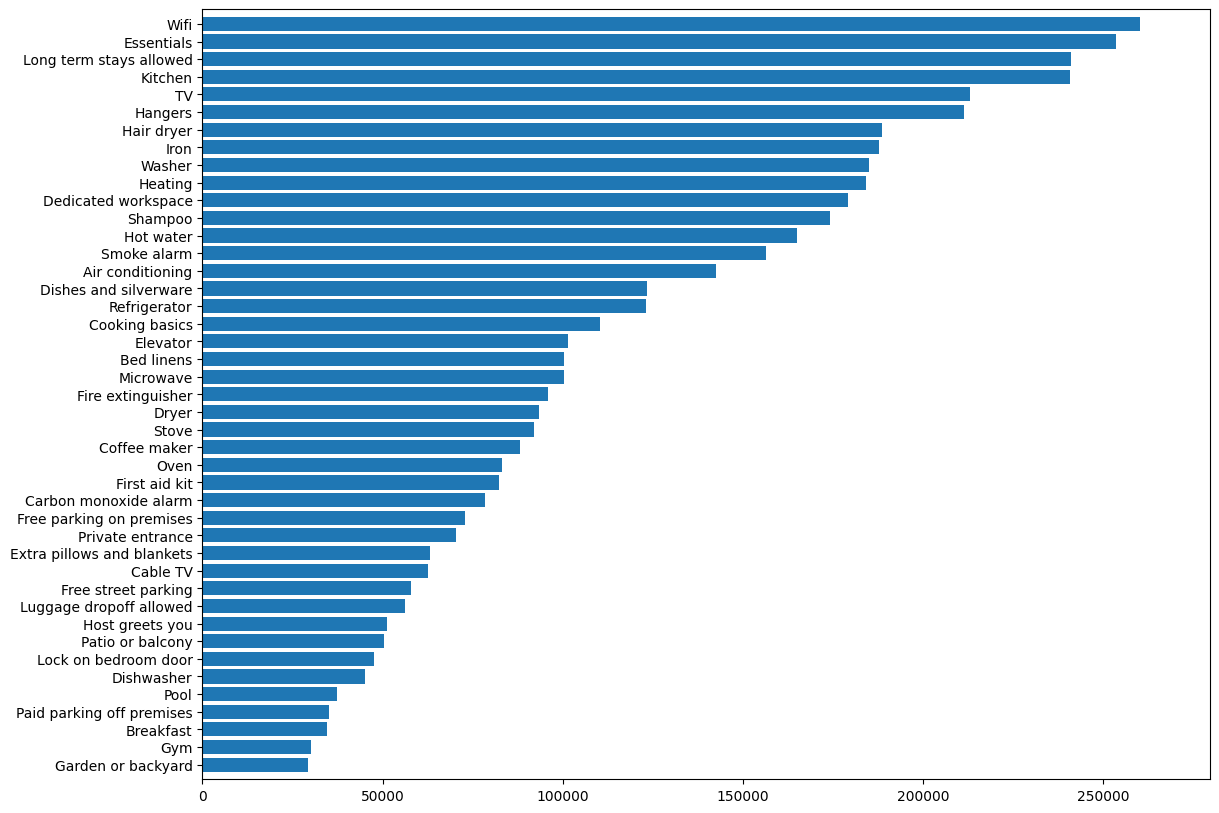

In [17]:
_temp = df_amenities_beneficial.sum().sort_values()

plt.figure(figsize=(13, 10))
plt.xlim(0, df.shape[0])  # Set max of X-axis to total number of datapoints
plt.margins(y=.01)  # Removing whitespace top and bottom
plt.barh(_temp.index, _temp.values)

Plotting `amenities` $\rightarrow$ `price`

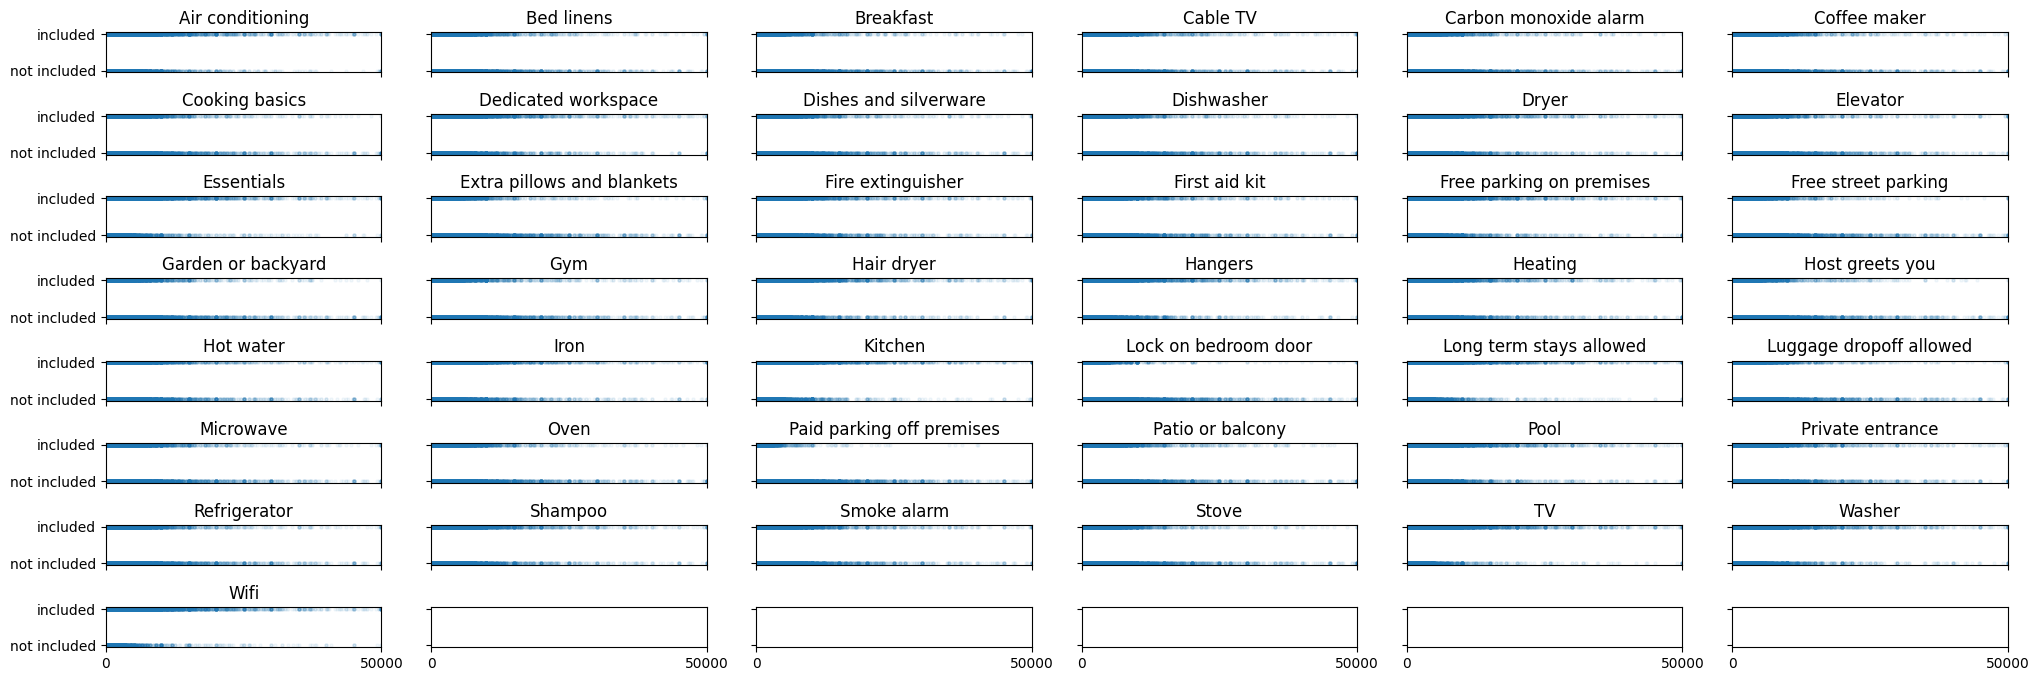

In [18]:
fig, axes = plt.subplots(
    df_amenities_beneficial.columns.size // 6 + (df_amenities_beneficial.columns.size % 6 != 0),
    6,
    sharex=True,
    sharey=True,
    figsize=(20, 7),
)

fig.tight_layout(pad=2)

# https://stackoverflow.com/a/19626667/13165967
plt.setp(
    axes,
    xticks=[0, 50_000],
    yticks=[0, 1],
    yticklabels=["not included", "included"],
    xlim=(0, 50_000),
)

for c, ax in zip(df_amenities_beneficial.columns, axes.ravel()):
    ax.scatter(df["price"], df_amenities_beneficial[c], alpha=.05, s=5)
    ax.title.set_text(c)

Correlation matrix between the used amenities [analytics/amenities_correlation.html](analytics/amenities_correlation.html)

In [19]:
corr_to_html("analytics/amenities_correlation.html", df_amenities_beneficial.corr(numeric_only=True, method="pearson").style.background_gradient(cmap='coolwarm'))

#### 3.1.1.4. Concat

In [20]:
df = pd.concat([df[df.columns.drop("amenities")], df_amenities_beneficial], axis=1)
df

,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,room_type,accommodates,bedrooms,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,Air conditioning,Bed linens,Breakfast,Cable TV,Carbon monoxide alarm,Coffee maker,Cooking basics,Dedicated workspace,Dishes and silverware,Dishwasher,Dryer,Elevator,Essentials,Extra pillows and blankets,Fire extinguisher,First aid kit,Free parking on premises,Free street parking,Garden or backyard,Gym,Hair dryer,Hangers,Heating,Host greets you,Hot water,Iron,Kitchen,Lock on bedroom door,Long term stays allowed,Luggage dropoff allowed,Microwave,Oven,Paid parking off premises,Patio or balcony,Pool,Private entrance,Refrigerator,Shampoo,Smoke alarm,Stove,TV,Washer,Wifi
0,False,1,True,False,48.88668,2.33343,Entire place,2,1,53,100,10,10,10,10,10,10,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,False,1,True,True,48.88617,2.34515,Entire place,2,1,120,100,10,10,10,10,10,10,False,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1
2,False,1,True,False,48.88112,2.31712,Entire place,2,1,89,100,10,10,10,10,10,10,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1
3,False,1,True,True,48.84571,2.30584,Entire place,2,1,58,100,10,10,10,10,10,10,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,False,1,True,False,48.85500,2.26979,Entire place,2,1,60,100,10,10,10,10,10,10,False,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,False,1,True,True,48.82701,2.31419,Entire place,2,1,120,100,10,10,10,10,10,10,False,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1
279708,False,1,True,True,48.89309,2.33206,Entire place,2,1,60,100,10,10,10,10,10,10,False,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1
279709,False,1,True,True,48.88699,2.34920,Entire place,2,1,50,100,10,10,10,10,10,10,False,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,1,1,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1
279710,False,1,True,True,48.86687,2.38123,Entire place,2,1,105,100,10,10,10,10,10,10,False,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1


### 3.1.2. Room type

In [21]:
df["room_type"].value_counts()

room_type
Entire place    182005
Private room     86988
Hotel room        5744
Shared room       4862
Name: count, dtype: int64

In [22]:
enc_room_type = OneHotEncoder(handle_unknown="error")
enc_room_type

OneHotEncoder()

In [23]:
enc_room_type.fit(df[["room_type"]])
enc_room_type.categories_[0].tolist()

['Entire place', 'Hotel room', 'Private room', 'Shared room']

In [24]:
df[enc_room_type.categories_[0].tolist()] = enc_room_type.transform(df[["room_type"]]).toarray()

In [25]:
df = df[df.columns.drop("room_type")]
df

,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,Air conditioning,Bed linens,Breakfast,Cable TV,Carbon monoxide alarm,Coffee maker,Cooking basics,Dedicated workspace,Dishes and silverware,Dishwasher,Dryer,Elevator,Essentials,Extra pillows and blankets,Fire extinguisher,First aid kit,Free parking on premises,Free street parking,Garden or backyard,Gym,Hair dryer,Hangers,Heating,Host greets you,Hot water,Iron,Kitchen,Lock on bedroom door,Long term stays allowed,Luggage dropoff allowed,Microwave,Oven,Paid parking off premises,Patio or balcony,Pool,Private entrance,Refrigerator,Shampoo,Smoke alarm,Stove,TV,Washer,Wifi,Entire place,Hotel room,Private room,Shared room
0,False,1,True,False,48.88668,2.33343,2,1,53,100,10,10,10,10,10,10,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,0.0,0.0,0.0
1,False,1,True,True,48.88617,2.34515,2,1,120,100,10,10,10,10,10,10,False,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1.0,0.0,0.0,0.0
2,False,1,True,False,48.88112,2.31712,2,1,89,100,10,10,10,10,10,10,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1.0,0.0,0.0,0.0
3,False,1,True,True,48.84571,2.30584,2,1,58,100,10,10,10,10,10,10,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1.0,0.0,0.0,0.0
4,False,1,True,False,48.85500,2.26979,2,1,60,100,10,10,10,10,10,10,False,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,False,1,True,True,48.82701,2.31419,2,1,120,100,10,10,10,10,10,10,False,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1.0,0.0,0.0,0.0
279708,False,1,True,True,48.89309,2.33206,2,1,60,100,10,10,10,10,10,10,False,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1.0,0.0,0.0,0.0
279709,False,1,True,True,48.88699,2.34920,2,1,50,100,10,10,10,10,10,10,False,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,1,1,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1.0,0.0,0.0,0.0
279710,False,1,True,True,48.86687,2.38123,2,1,105,100,10,10,10,10,10,10,False,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1.0,0.0,0.0,0.0


### 3.1.3. boolean features

In [26]:
s_bool_columns = df.dtypes[df.dtypes == 'bool'].index
s_bool_columns

Index(['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'instant_bookable'],
      dtype='object')

In [27]:
df.loc[:, s_bool_columns] = df[s_bool_columns].astype(int)

In [28]:
df.head()

,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,Air conditioning,Bed linens,Breakfast,Cable TV,Carbon monoxide alarm,Coffee maker,Cooking basics,Dedicated workspace,Dishes and silverware,Dishwasher,Dryer,Elevator,Essentials,Extra pillows and blankets,Fire extinguisher,First aid kit,Free parking on premises,Free street parking,Garden or backyard,Gym,Hair dryer,Hangers,Heating,Host greets you,Hot water,Iron,Kitchen,Lock on bedroom door,Long term stays allowed,Luggage dropoff allowed,Microwave,Oven,Paid parking off premises,Patio or balcony,Pool,Private entrance,Refrigerator,Shampoo,Smoke alarm,Stove,TV,Washer,Wifi,Entire place,Hotel room,Private room,Shared room
0,0,1,1,0,48.88668,2.33343,2,1,53,100,10,10,10,10,10,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,0.0,0.0,0.0
1,0,1,1,1,48.88617,2.34515,2,1,120,100,10,10,10,10,10,10,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1.0,0.0,0.0,0.0
2,0,1,1,0,48.88112,2.31712,2,1,89,100,10,10,10,10,10,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1.0,0.0,0.0,0.0
3,0,1,1,1,48.84571,2.30584,2,1,58,100,10,10,10,10,10,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1.0,0.0,0.0,0.0
4,0,1,1,0,48.85500,2.26979,2,1,60,100,10,10,10,10,10,10,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1.0,0.0,0.0,0.0


## 3.2. Numerical

### 3.2.1. `review_scores_*`

In [29]:
range_reviews = slice("review_scores_rating", "review_scores_value")
range_reviews

slice('review_scores_rating', 'review_scores_value', None)

#### 3.2.1.1. `null` values

In [30]:
df_review_scores = df[df.isnull().any(axis=1)].loc[:, range_reviews]
df_review_scores

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
1705,100,10,10,<NA>,10,<NA>,<NA>
1936,80,<NA>,<NA>,8,8,8,8
1955,80,<NA>,<NA>,<NA>,8,8,8
1960,100,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1962,80,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...
278165,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
278166,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
278167,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
278294,100,<NA>,<NA>,<NA>,10,10,10


##### 3.2.1.1.1. derive

In situations where we have missing data in the `review_scores_rating` $\rightarrow$ `review_scores_value` columns, we can sometimes use the other `review_scores_*` columns to derive the missing values.

First scale the `review_scores_rating` column

In [31]:
df_review_scores["review_scores_rating"] /= 10

Than we can take the mean

In [32]:
s_review_scores_mean = df_review_scores.mean(axis=1)
s_review_scores_mean

1705          10.0
1936           8.0
1955           8.0
1960          10.0
1962           8.0
            ...   
278165         NaN
278166         NaN
278167         NaN
278294        10.0
278312    9.333333
Length: 111611, dtype: object

Only use the *non-null* values

In [33]:
s_review_scores_mean.dropna(inplace=True)
s_review_scores_mean

1705          10.0
1936           8.0
1955           8.0
1960          10.0
1962           8.0
            ...   
277682    8.333333
277689        10.0
277690         8.0
278294        10.0
278312    9.333333
Length: 20347, dtype: object

Change the type to `int`

In [34]:
s_review_scores_mean = np.floor(s_review_scores_mean).astype(int)
s_review_scores_mean

1705      10
1936       8
1955       8
1960      10
1962       8
          ..
277682     8
277689    10
277690     8
278294    10
278312     9
Length: 20347, dtype: int32

Set missing values

In [35]:
# Because inplace does not work:
df.loc[s_review_scores_mean.index, "review_scores_accuracy":"review_scores_value"] = df.loc[s_review_scores_mean.index, "review_scores_accuracy":"review_scores_value"].fillna({c: s_review_scores_mean for c in df_review_scores.columns})
df.loc[s_review_scores_mean.index, "review_scores_rating"] = df.loc[s_review_scores_mean.index, "review_scores_rating"].fillna(s_review_scores_mean * 10)

df.loc[s_review_scores_mean.index, range_reviews]

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
1705,100,10,10,10,10,10,10
1936,80,8,8,8,8,8,8
1955,80,8,8,8,8,8,8
1960,100,10,10,10,10,10,10
1962,80,8,8,8,8,8,8
...,...,...,...,...,...,...,...
277682,80,10,8,6,8,8,10
277689,100,10,10,10,10,10,10
277690,80,8,8,8,8,8,8
278294,100,10,10,10,10,10,10


##### 3.2.1.1.2. mean

We will use the mean of each column to fill in any missing data.

In [36]:
null_mask = df.loc[:, range_reviews].isnull().any(axis=1)
null_mask.value_counts()

False    188335
True      91264
Name: count, dtype: int64

In [37]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df.loc[:, range_reviews])

SimpleImputer()

In [38]:
df[null_mask].loc[:, range_reviews]

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
1990,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1991,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1992,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1993,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1994,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...
278163,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
278164,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
278165,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
278166,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [39]:
df.loc[:, range_reviews] = imp.transform(df.loc[:, range_reviews])

In [40]:
df[null_mask].loc[:, range_reviews]

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
1990,93.404104,9.563756,9.311636,9.699355,9.696774,9.631731,9.333778
1991,93.404104,9.563756,9.311636,9.699355,9.696774,9.631731,9.333778
1992,93.404104,9.563756,9.311636,9.699355,9.696774,9.631731,9.333778
1993,93.404104,9.563756,9.311636,9.699355,9.696774,9.631731,9.333778
1994,93.404104,9.563756,9.311636,9.699355,9.696774,9.631731,9.333778
...,...,...,...,...,...,...,...
278163,93.404104,9.563756,9.311636,9.699355,9.696774,9.631731,9.333778
278164,93.404104,9.563756,9.311636,9.699355,9.696774,9.631731,9.333778
278165,93.404104,9.563756,9.311636,9.699355,9.696774,9.631731,9.333778
278166,93.404104,9.563756,9.311636,9.699355,9.696774,9.631731,9.333778


In [41]:
null_mask = df.loc[:, range_reviews].isnull().any(axis=1)
null_mask.value_counts()

False    279599
Name: count, dtype: int64

Now we need to update the values to valid ordinal numbers.

In [42]:
columns_reviews = df.loc[:, range_reviews].columns
columns_reviews

Index(['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'],
      dtype='object')

In [43]:
df.loc[:, columns_reviews] = df[columns_reviews].apply(np.floor)

In [44]:
df[columns_reviews]

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,100.0,10.0,10.0,10.0,10.0,10.0,10.0
1,100.0,10.0,10.0,10.0,10.0,10.0,10.0
2,100.0,10.0,10.0,10.0,10.0,10.0,10.0
3,100.0,10.0,10.0,10.0,10.0,10.0,10.0
4,100.0,10.0,10.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...
279707,100.0,10.0,10.0,10.0,10.0,10.0,10.0
279708,100.0,10.0,10.0,10.0,10.0,10.0,10.0
279709,100.0,10.0,10.0,10.0,10.0,10.0,10.0
279710,100.0,10.0,10.0,10.0,10.0,10.0,10.0


#### 3.2.1.2. scale

In [45]:
df.loc[:, "review_scores_accuracy":"review_scores_value"] /= 10
df.loc[:, "review_scores_rating"] /= 100

In [46]:
df.loc[:, columns_reviews]

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
279707,1.0,1.0,1.0,1.0,1.0,1.0,1.0
279708,1.0,1.0,1.0,1.0,1.0,1.0,1.0
279709,1.0,1.0,1.0,1.0,1.0,1.0,1.0
279710,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### 3.2.2. geographical features

In [47]:
df[["latitude", "longitude"]]

,latitude,longitude
0,48.88668,2.33343
1,48.88617,2.34515
2,48.88112,2.31712
3,48.84571,2.30584
4,48.85500,2.26979
...,...,...
279707,48.82701,2.31419
279708,48.89309,2.33206
279709,48.88699,2.34920
279710,48.86687,2.38123


In [48]:
df.loc[:, "latitude"] /= 90

In [49]:
df.loc[:, "longitude"] /= 180

In [50]:
df[["latitude", "longitude"]]

,latitude,longitude
0,0.543185,0.012963
1,0.543180,0.013029
2,0.543124,0.012873
3,0.542730,0.012810
4,0.542833,0.012610
...,...,...
279707,0.542522,0.012857
279708,0.543257,0.012956
279709,0.543189,0.013051
279710,0.542965,0.013229


### 3.2.3. SimpleImputer `bedrooms` & `host_total_listings_count`

In [51]:
df["host_total_listings_count"].isnull().value_counts()

host_total_listings_count
False    279434
True        165
Name: count, dtype: int64

In [52]:
df["bedrooms"].isnull().value_counts()

bedrooms
False    250277
True      29322
Name: count, dtype: int64

In [53]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [54]:
df.loc[:, ["host_total_listings_count", "bedrooms"]] = imp.fit_transform(df[["host_total_listings_count", "bedrooms"]])

### 3.2.4. MinMaxScaler `accommodates`, `bedrooms`, and `host_total_listings_count`

In [55]:
mm_scaler = MinMaxScaler()
mm_scaler

MinMaxScaler()

In [56]:
col = ["accommodates", "bedrooms", "host_total_listings_count"]
df.loc[:, col] = mm_scaler.fit_transform(df[col])
df[col]

,accommodates,bedrooms,host_total_listings_count
0,0.066667,0.0,0.000138
1,0.066667,0.0,0.000138
2,0.066667,0.0,0.000138
3,0.066667,0.0,0.000138
4,0.066667,0.0,0.000138
...,...,...,...
279707,0.066667,0.0,0.000138
279708,0.066667,0.0,0.000138
279709,0.066667,0.0,0.000138
279710,0.066667,0.0,0.000138


## 3.3. Move `price` to front

In [57]:
price = df.pop("price")
df.insert(0, price.name, price)

df

,price,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,Air conditioning,Bed linens,Breakfast,Cable TV,Carbon monoxide alarm,Coffee maker,Cooking basics,Dedicated workspace,Dishes and silverware,Dishwasher,Dryer,Elevator,Essentials,Extra pillows and blankets,Fire extinguisher,First aid kit,Free parking on premises,Free street parking,Garden or backyard,Gym,Hair dryer,Hangers,Heating,Host greets you,Hot water,Iron,Kitchen,Lock on bedroom door,Long term stays allowed,Luggage dropoff allowed,Microwave,Oven,Paid parking off premises,Patio or balcony,Pool,Private entrance,Refrigerator,Shampoo,Smoke alarm,Stove,TV,Washer,Wifi,Entire place,Hotel room,Private room,Shared room
0,53,0,0.000138,1,0,0.543185,0.012963,0.066667,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,0.0,0.0,0.0
1,120,0,0.000138,1,1,0.543180,0.013029,0.066667,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1.0,0.0,0.0,0.0
2,89,0,0.000138,1,0,0.543124,0.012873,0.066667,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1.0,0.0,0.0,0.0
3,58,0,0.000138,1,1,0.542730,0.012810,0.066667,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1.0,0.0,0.0,0.0
4,60,0,0.000138,1,0,0.542833,0.012610,0.066667,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,120,0,0.000138,1,1,0.542522,0.012857,0.066667,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1.0,0.0,0.0,0.0
279708,60,0,0.000138,1,1,0.543257,0.012956,0.066667,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1.0,0.0,0.0,0.0
279709,50,0,0.000138,1,1,0.543189,0.013051,0.066667,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,1,1,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1.0,0.0,0.0,0.0
279710,105,0,0.000138,1,1,0.542965,0.013229,0.066667,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1.0,0.0,0.0,0.0


## 3.2. Store

In [58]:
df.to_pickle("./pickles/003.dataframe.data-preprocessing.pkl")